In [1]:
import logging
import mayavi.mlab as mlab
import seaborn as sns

sns.set_context("paper")
sns.set(font_scale=3)
sns.set_style("white")

logging.captureWarnings(True)
sns.set_context("paper")

# Network Action of SCCwm-DBS
## Support Modeling : Virtual Dissection

In this notebook we'll perform the virtual dissection of OnTarget SCCwm-DBS effects along engaged traactography

In [2]:
from dbspace.control import offline_segments
from dbspace.control.DTI_support import (
    DTI_support_model,
    plot_support_model,
    plot_EEG_masks,
)

Using DBSpace LATEST
Importing from DBSpace.control...


In [3]:

condit = "OnT"
pt_list = ["906","907","908"]

In [4]:

eFrame = offline_segments.network_action_dEEG(
    pts=pt_list, procsteps="conservative", condits=[condit], config_file='../../analysis/configs/targeting_experiment.json'
)
eFrame.standard_pipeline()
eFrame.OnT_ctrl_dyn(condit=condit)


Doing standard init pipeline
Pooling Patient Observations
Computing Bootstrap Median Response for POOL


Computing Median Response for 906
Doing <function median at 0x7faf71294ee0>
43
117
Primary mean: 0.6686322941074341
Secondary mean: -0.43736753050054133
KstestResult(statistic=0.6491751142913934, pvalue=3.9523939676655573e-13)


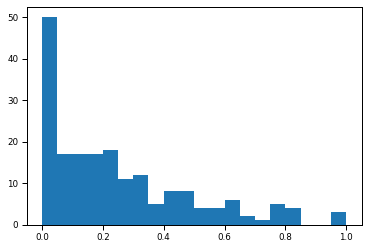

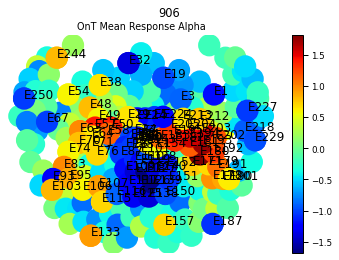

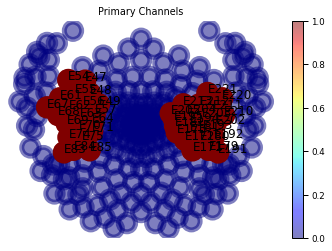

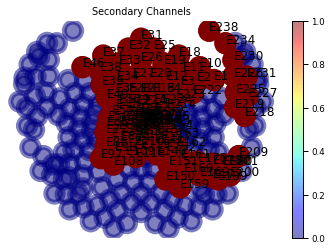

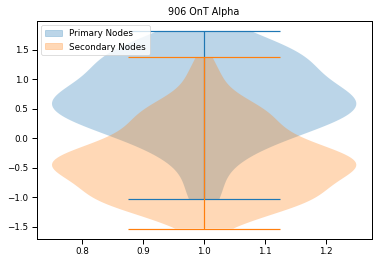

In [5]:
# Virtual Dissection Here
band = "Alpha"
pt='906'

EEG_support = DTI_support_model(
    pt,
    4,
    dti_parcel_thresh=20,
    eeg_thresh=50,
    electrode_map_file="../../assets/experiments/metadata/Electrode_Map.json",
)

plot_support_model(
    EEG_support,
    pt,
    layers=[1, 0, 0],
    electrode_map_file="../../assets/experiments/metadata/Electrode_Map.json",
)

plot_EEG_masks(EEG_support)

eFrame.support_analysis(
    support_struct=EEG_support,
    condit=condit,
    pt=pt,
    band=band,
    voltage=str(3),
)


In [6]:
import mayavi.mlab as mlab
mlab.show()

KeyboardInterrupt: 